# Decision Tree Classification


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler


## Load Dataset

In [2]:

df = pd.read_excel('/content/heart_disease.xlsx')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


## Exploratory Data Analysis (EDA)

In [3]:

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


### Missing Values Check

In [4]:

df.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


### Handling Missing Values (oldpeak)

In [5]:

df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())


### Outlier Analysis using Box Plots

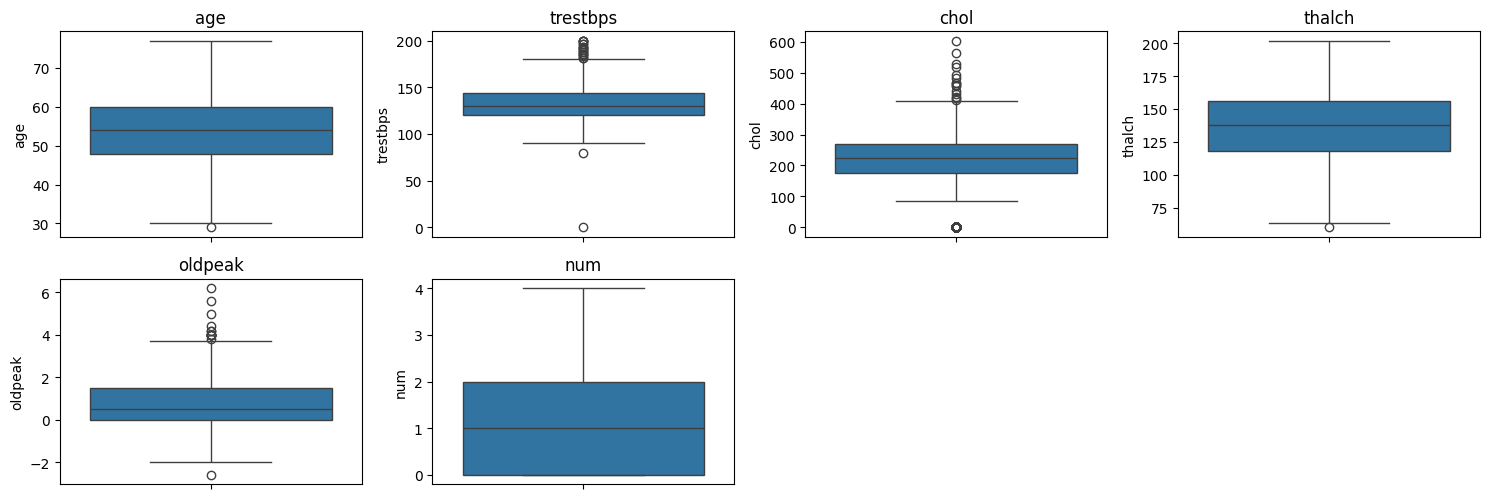

In [6]:

numeric_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4,4,i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


### Feature Distributions

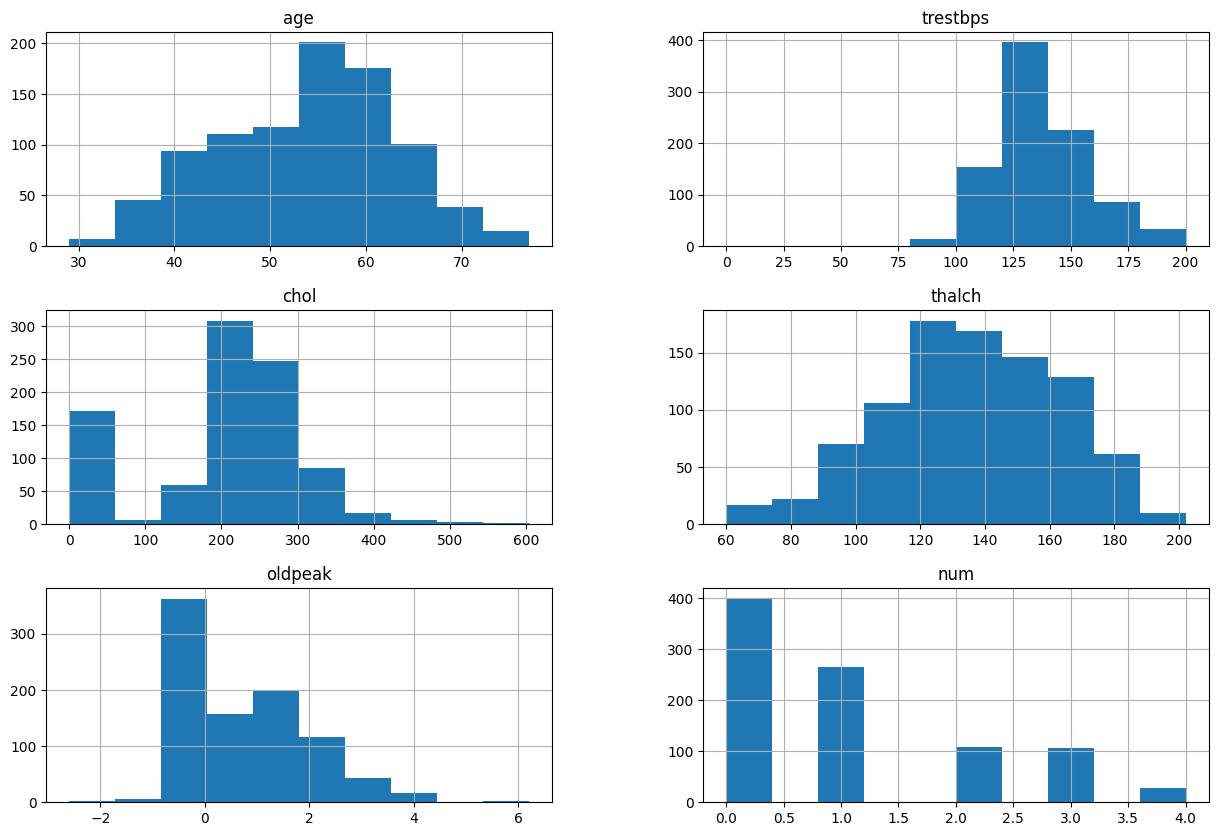

In [7]:

df.hist(figsize=(15,10))
plt.show()


### Correlation Matrix

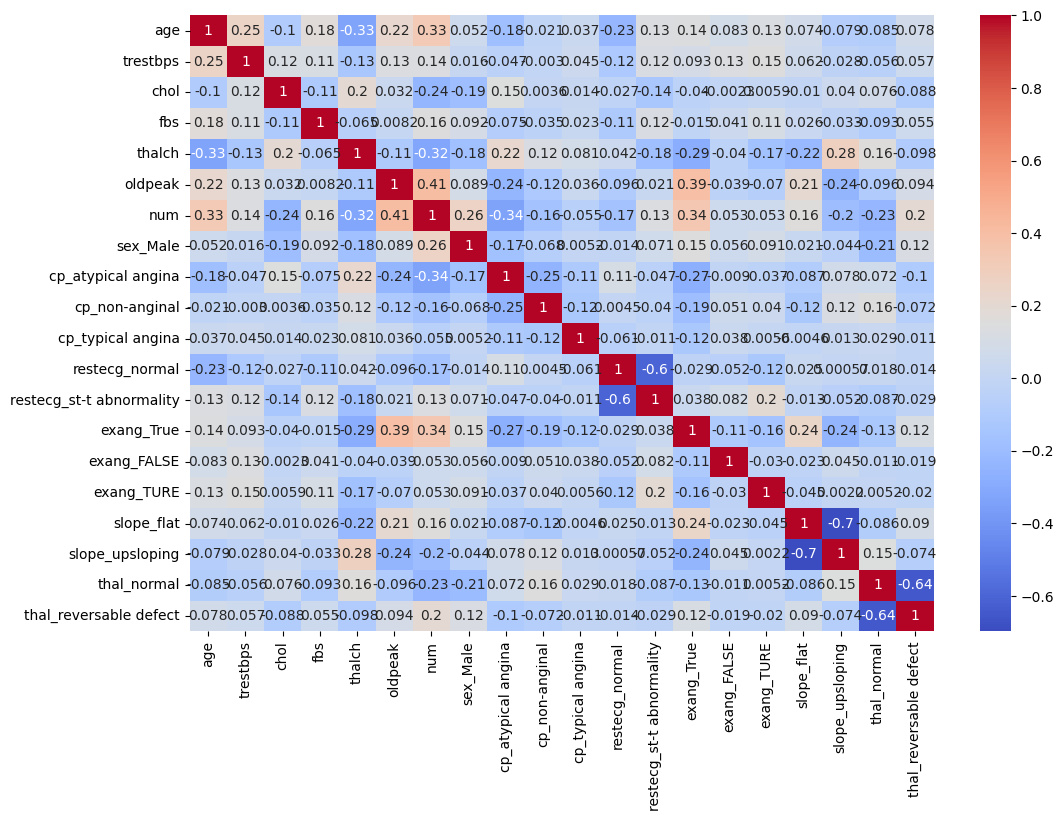

In [10]:
df_encoded = pd.get_dummies(df, drop_first=True)

plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

## Feature Engineering & Scaling

In [13]:
X = df_encoded.drop('num', axis=1)
y = df_encoded['num']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


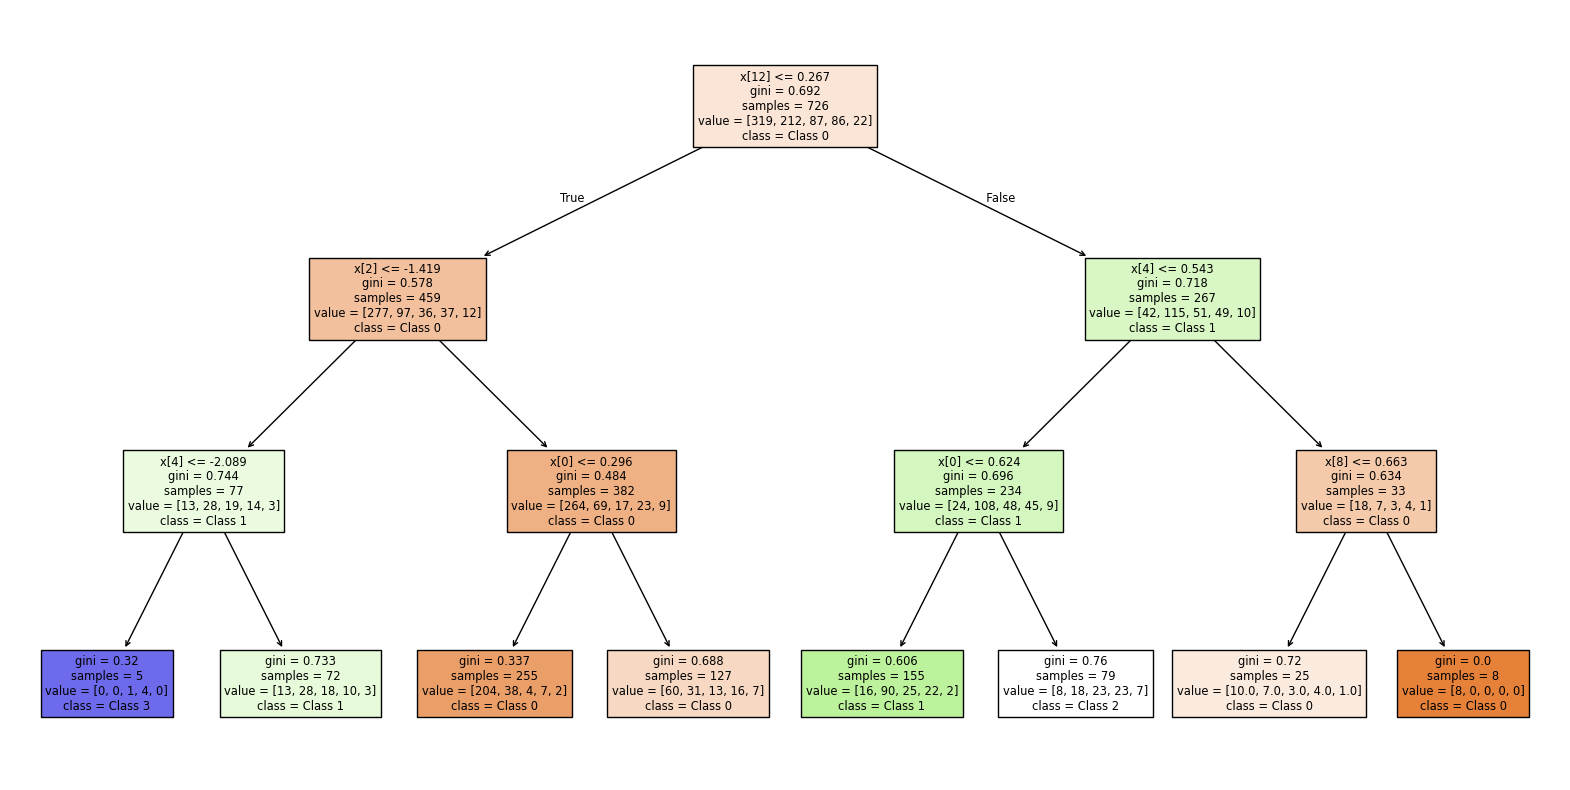

In [24]:
plt.figure(figsize=(20,10))
plot_tree(best_dt, class_names=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'], filled=True, max_depth=3)
plt.show()

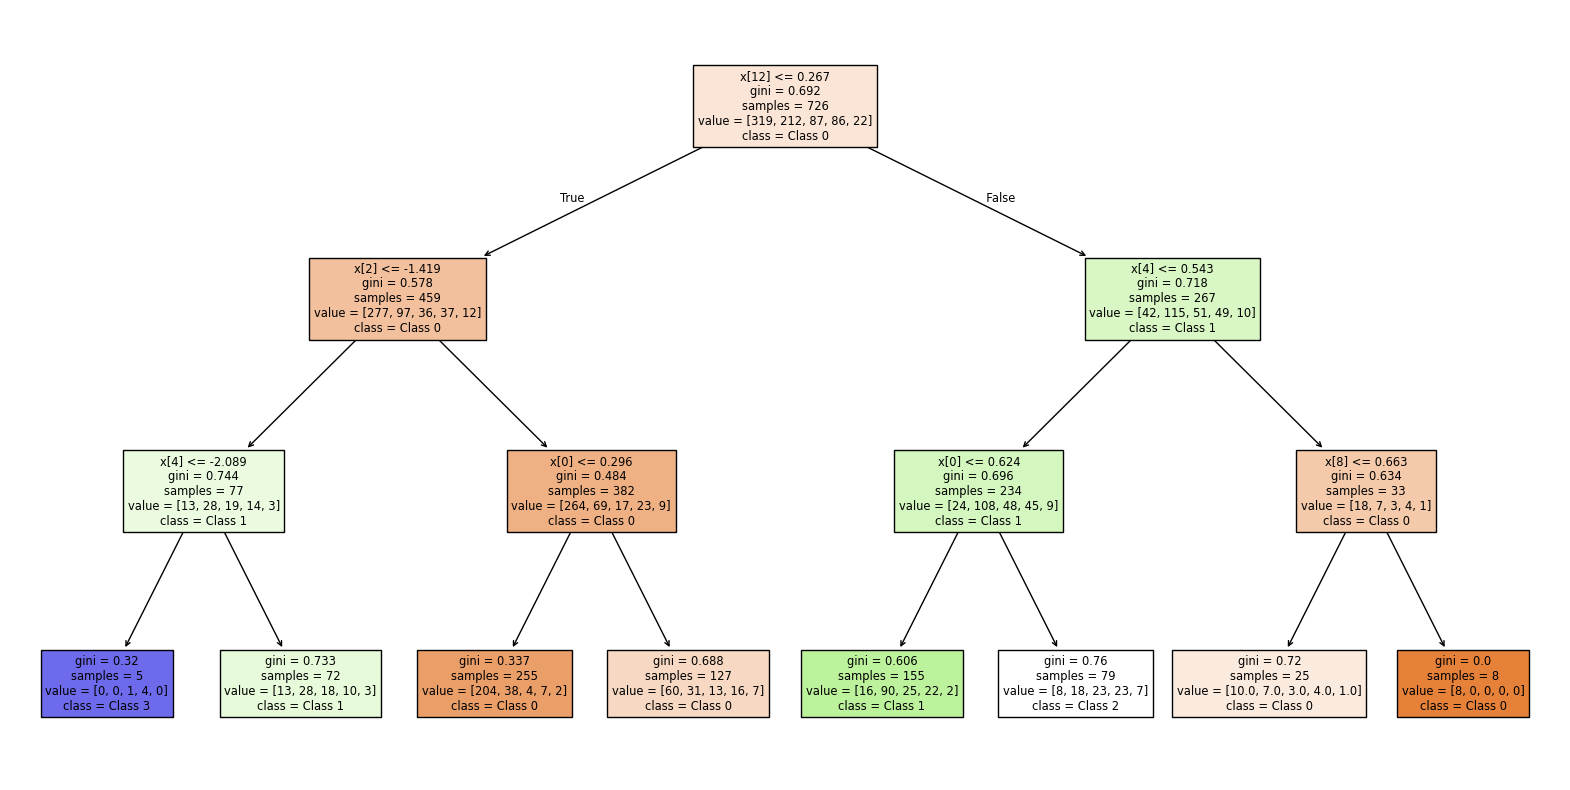

In [25]:
plt.figure(figsize=(20,10))
plot_tree(best_dt, class_names=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'], filled=True, max_depth=3)
plt.show()

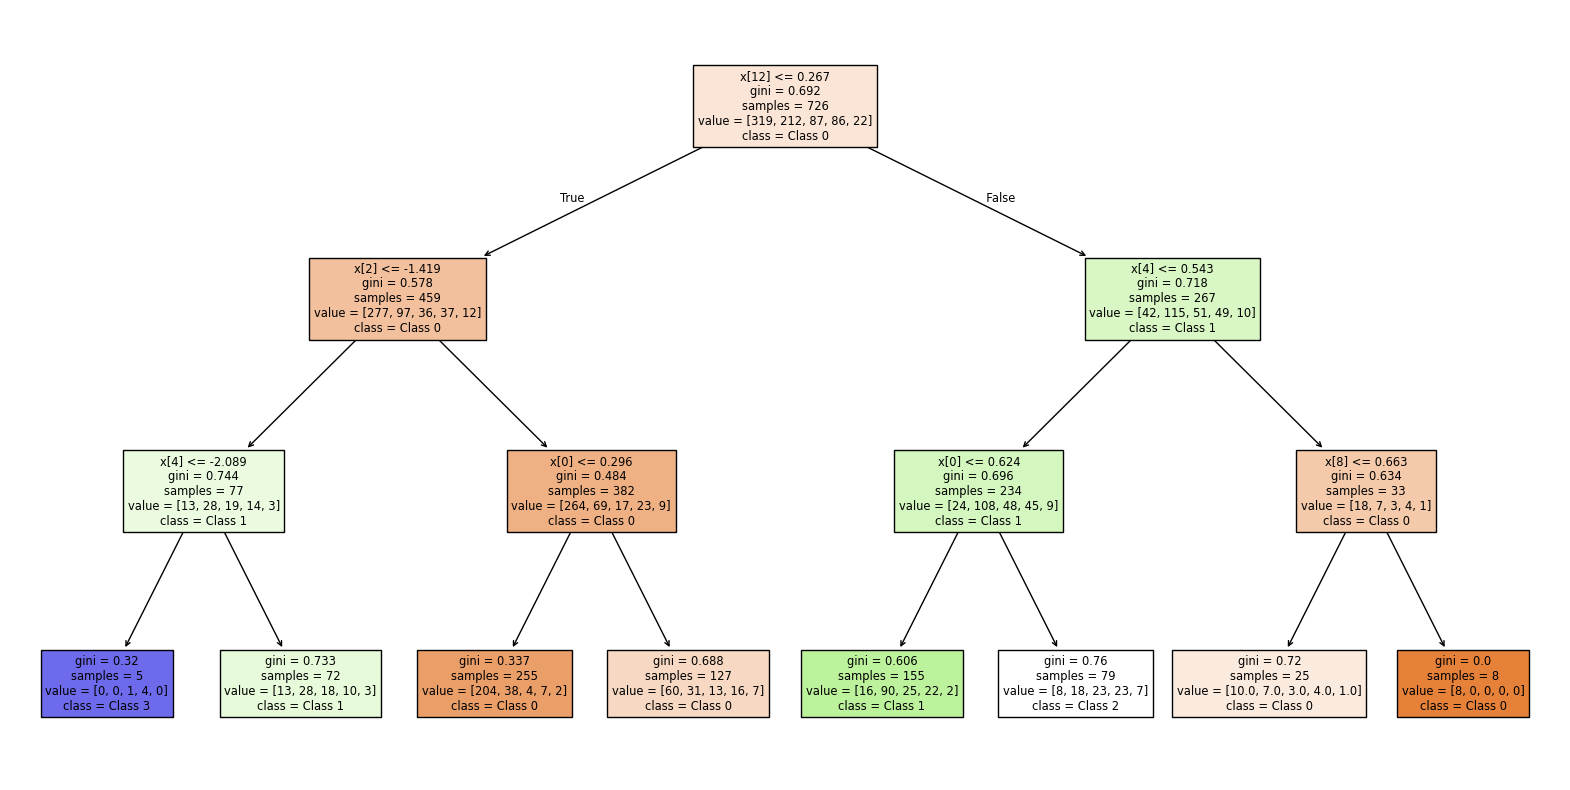

In [26]:
plt.figure(figsize=(20,10))
plot_tree(best_dt, class_names=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'], filled=True, max_depth=3)
plt.show()

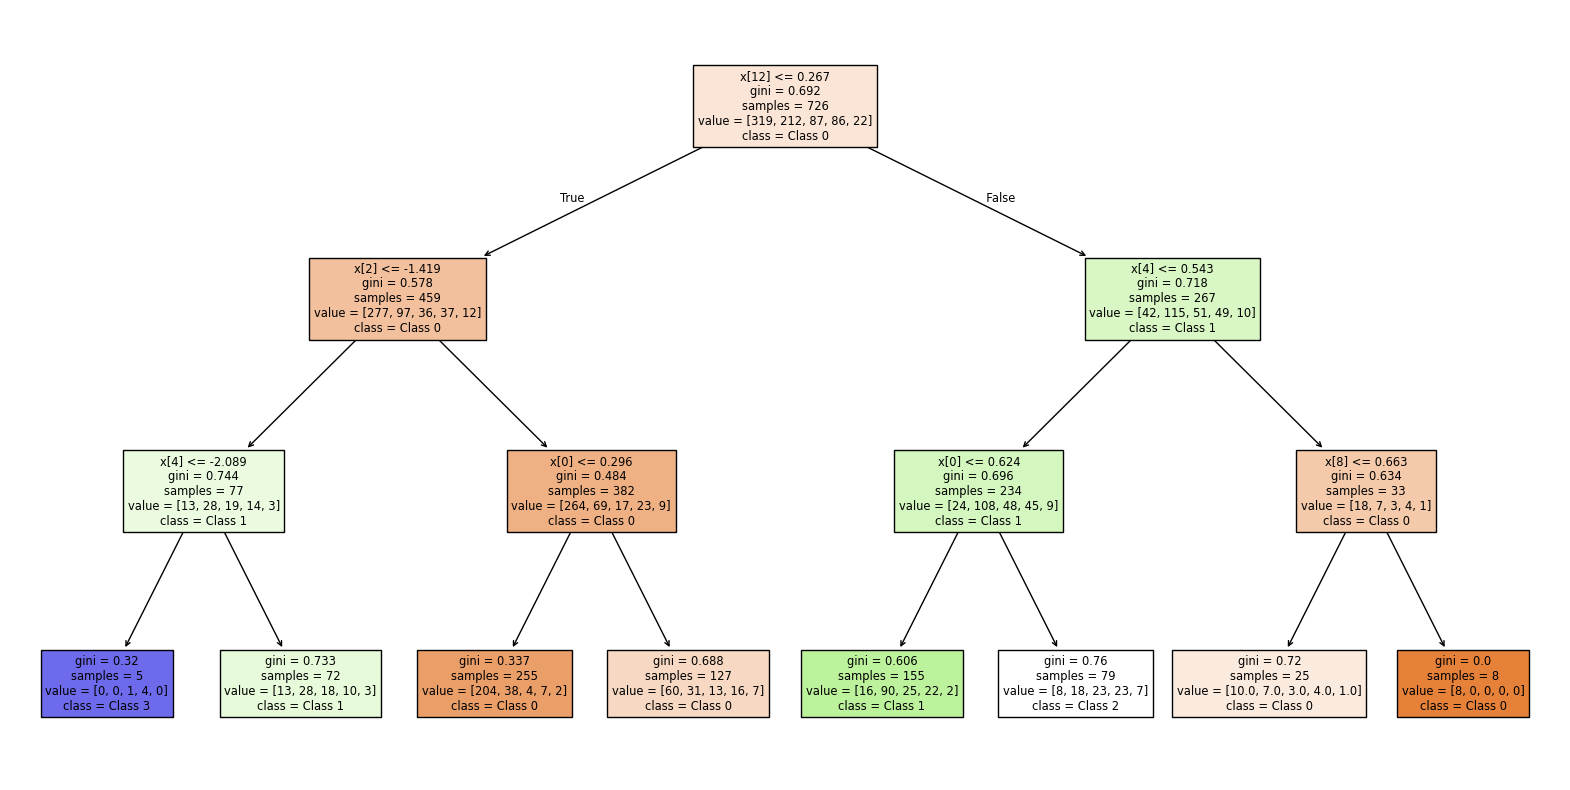

In [27]:
plt.figure(figsize=(20,10))
plot_tree(best_dt, class_names=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'], filled=True, max_depth=3)
plt.show()

In [14]:
X = df_encoded.drop('num', axis=1)
y = df_encoded['num']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [16]:

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.71      0.72        80
           1       0.45      0.42      0.43        53
           2       0.28      0.32      0.30        22
           3       0.25      0.29      0.27        21
           4       0.00      0.00      0.00         6

    accuracy                           0.51       182
   macro avg       0.34      0.35      0.34       182
weighted avg       0.51      0.51      0.51       182



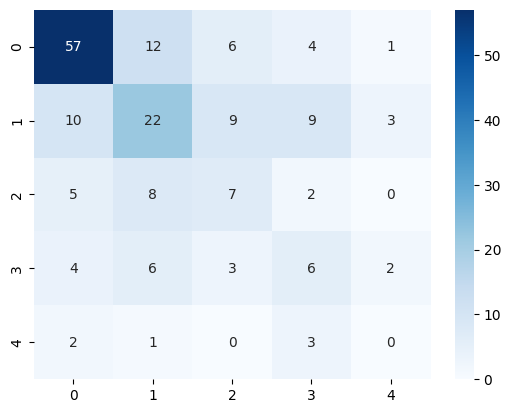

In [17]:

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()


In [28]:
roc_auc_score(y_test, dt_model.predict_proba(X_test), multi_class='ovr', average='weighted')

np.float64(0.663211585075247)

In [19]:

param_grid = {
    'max_depth': [3,5,7,10,None],
    'min_samples_split': [2,5,10],
    'criterion': ['gini','entropy']
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid.fit(X_train, y_train)
grid.best_params_


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}

In [20]:

best_dt = grid.best_estimator_
y_pred_best = best_dt.predict(X_test)
print(classification_report(y_test, y_pred_best))


              precision    recall  f1-score   support

           0       0.67      0.84      0.74        80
           1       0.38      0.40      0.39        53
           2       0.04      0.05      0.04        22
           3       1.00      0.05      0.09        21
           4       0.00      0.00      0.00         6

    accuracy                           0.49       182
   macro avg       0.42      0.27      0.25       182
weighted avg       0.53      0.49      0.46       182



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:

pd.Series(best_dt.feature_importances_, index=X.columns).sort_values(ascending=False).head(10)


,0
exang_True,0.443094
chol,0.225141
age,0.197617
thalch,0.105929
cp_non-anginal,0.028219
trestbps,0.000000
oldpeak,0.000000
sex_Male,0.000000
cp_atypical angina,0.000000
cp_typical angina,0.000000


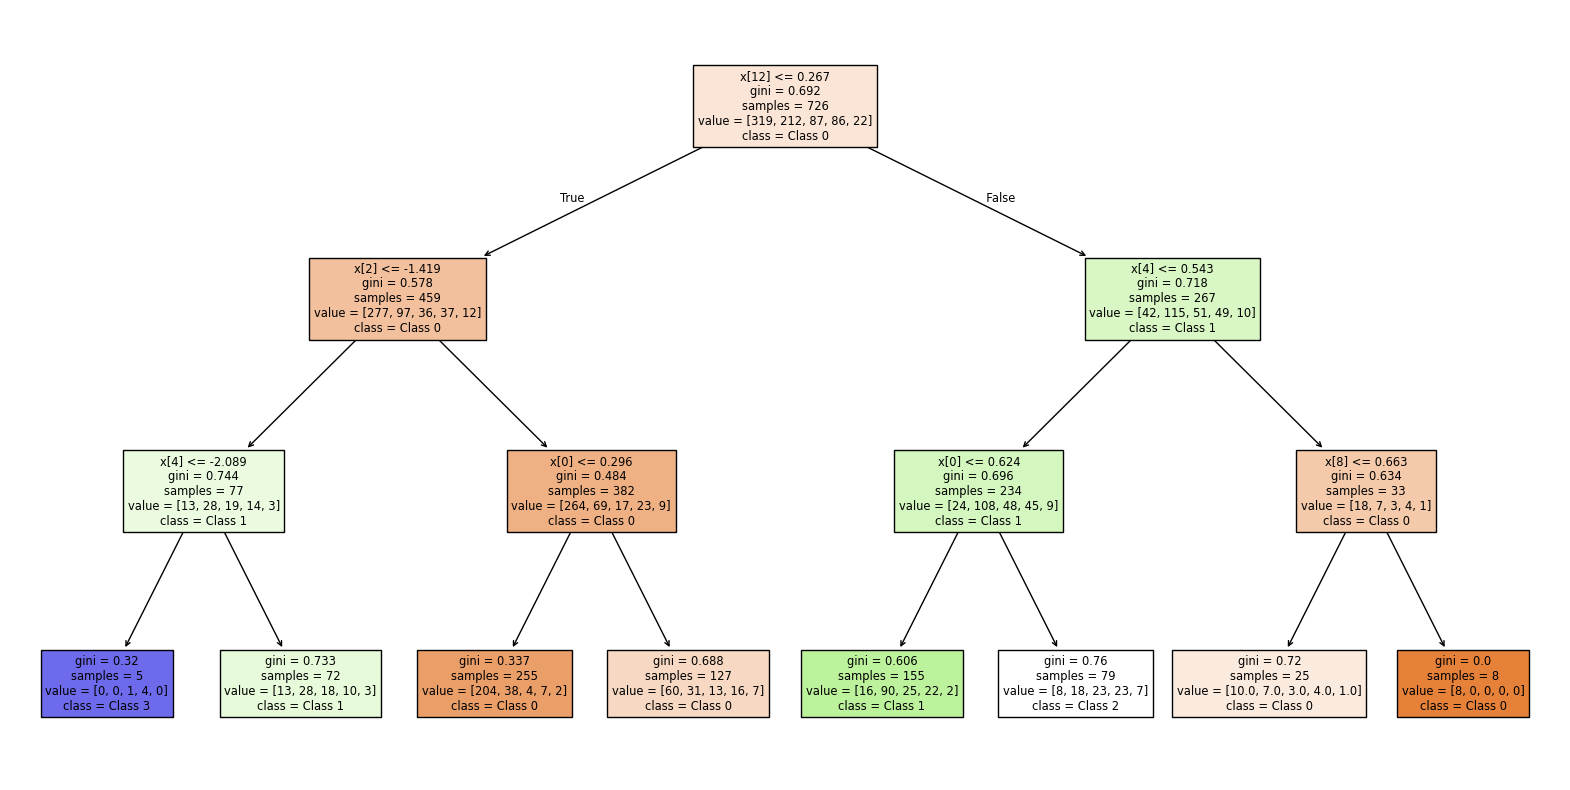

In [23]:
plt.figure(figsize=(20,10))
plot_tree(best_dt, class_names=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'], filled=True, max_depth=3)
plt.show()

## Train-Test Split

In [29]:

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


## Decision Tree Model

In [30]:

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.71      0.72        80
           1       0.45      0.42      0.43        53
           2       0.28      0.32      0.30        22
           3       0.25      0.29      0.27        21
           4       0.00      0.00      0.00         6

    accuracy                           0.51       182
   macro avg       0.34      0.35      0.34       182
weighted avg       0.51      0.51      0.51       182



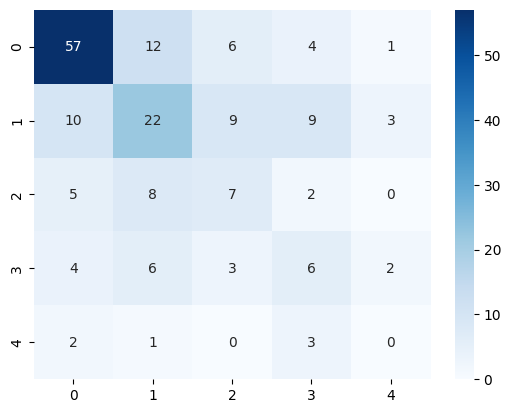

In [31]:

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()


In [33]:
roc_auc_score(y_test, dt_model.predict_proba(X_test), multi_class='ovr', average='weighted')

np.float64(0.663211585075247)

## Hyperparameter Tuning

In [34]:

param_grid = {
    'max_depth': [3,5,7,10,None],
    'min_samples_split': [2,5,10],
    'criterion': ['gini','entropy']
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid.fit(X_train, y_train)
grid.best_params_


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}

## Best Model Evaluation

In [35]:

best_dt = grid.best_estimator_
y_pred_best = best_dt.predict(X_test)
print(classification_report(y_test, y_pred_best))


              precision    recall  f1-score   support

           0       0.67      0.84      0.74        80
           1       0.38      0.40      0.39        53
           2       0.04      0.05      0.04        22
           3       1.00      0.05      0.09        21
           4       0.00      0.00      0.00         6

    accuracy                           0.49       182
   macro avg       0.42      0.27      0.25       182
weighted avg       0.53      0.49      0.46       182



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Feature Importance

In [36]:

pd.Series(best_dt.feature_importances_).sort_values(ascending=False).head(10)


,0
12,0.443094
2,0.225141
0,0.197617
4,0.105929
8,0.028219
1,0.000000
5,0.000000
6,0.000000
7,0.000000
9,0.000000


## Decision Tree Visualization

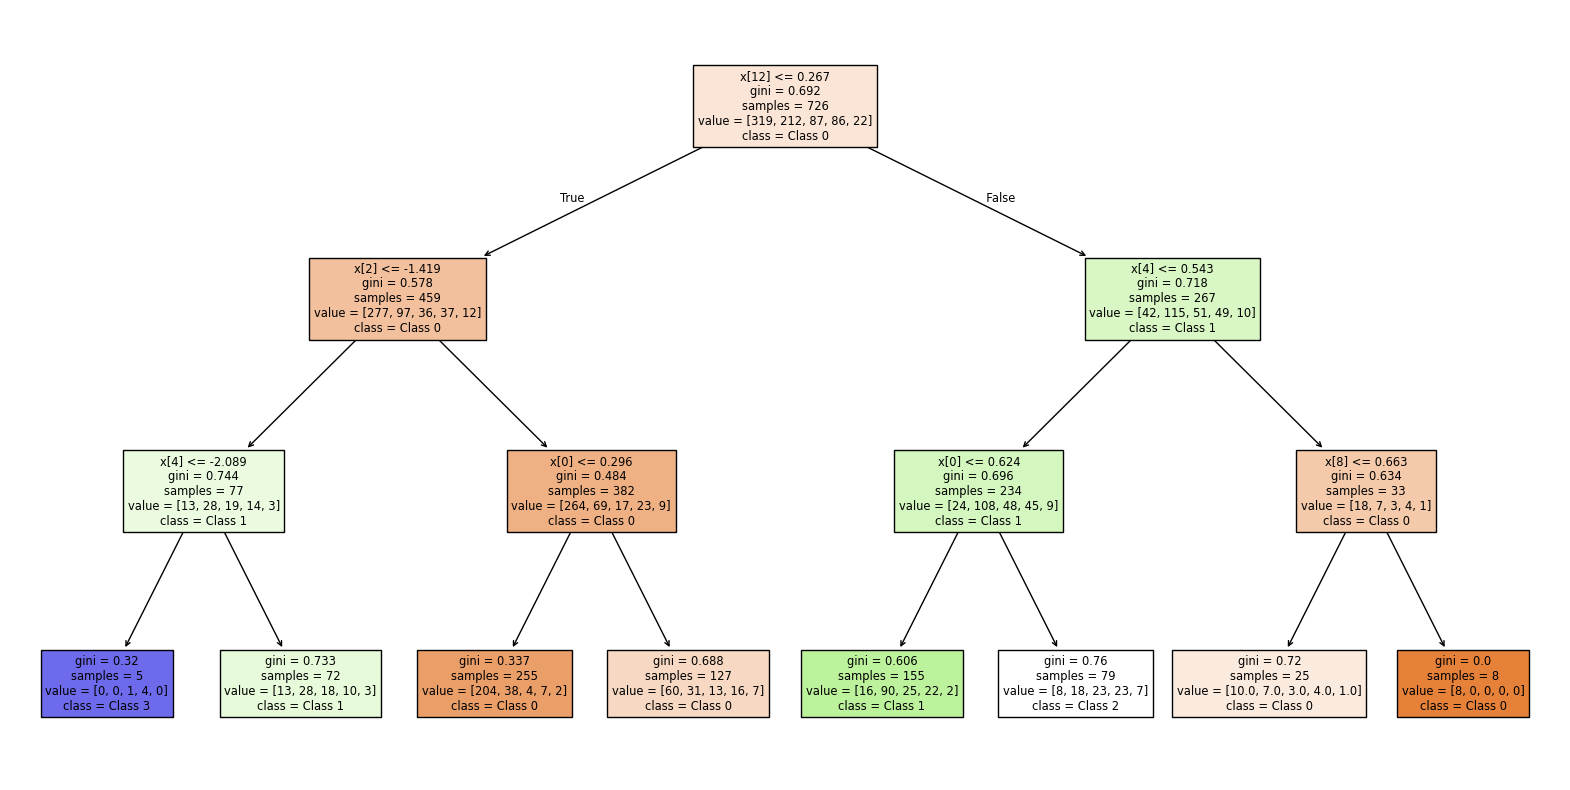

In [38]:
plt.figure(figsize=(20,10))
plot_tree(best_dt, class_names=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'], filled=True, max_depth=3)
plt.show()

## Interview Questions

### 1. Common Hyperparameters of Decision Trees

- **max_depth**: Controls tree depth and overfitting
- **min_samples_split**: Minimum samples required to split a node
- **min_samples_leaf**: Minimum samples in leaf nodes
- **criterion**: Metric to measure split quality (gini or entropy)
- **max_features**: Number of features considered per split

### 2. Label Encoding vs One-Hot Encoding

| Aspect | Label Encoding | One-Hot Encoding |
|------|---------------|----------------|
| Output | Integer values | Binary columns |
| Ordinality | Implies order | No order assumed |
| Use case | Tree-based models | Linear models |
| Dimensionality | Low | High |

**Conclusion:** Decision Trees can work with label encoding, while linear models prefer one-hot encoding.